In [102]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd


In [24]:
STARTER_PATH = "./csv_outputs/"

## Customer Segmentation

### Code Block 6 : customer segmentation Based on Location

In [97]:
data_block6 = pd.read_csv(STARTER_PATH + "3.Code_Block_6__segmentaion_Based_on_Location.csv")
data_block6.head()

,customer_id,customer_city,total_customers
0,9ef432eb6251297304e76186b10a928d,sao paulo,15540
1,494dded5b201313c64ed7f100595b95c,rio de janeiro,6882
2,bf141bf67fbe428d558bcf0e018eab60,belo horizonte,2773
3,8644be24d48806bc3a88fd59fb47ceb1,brasilia,2131
4,9c338ea8093192e203bc16add78c123c,curitiba,1521


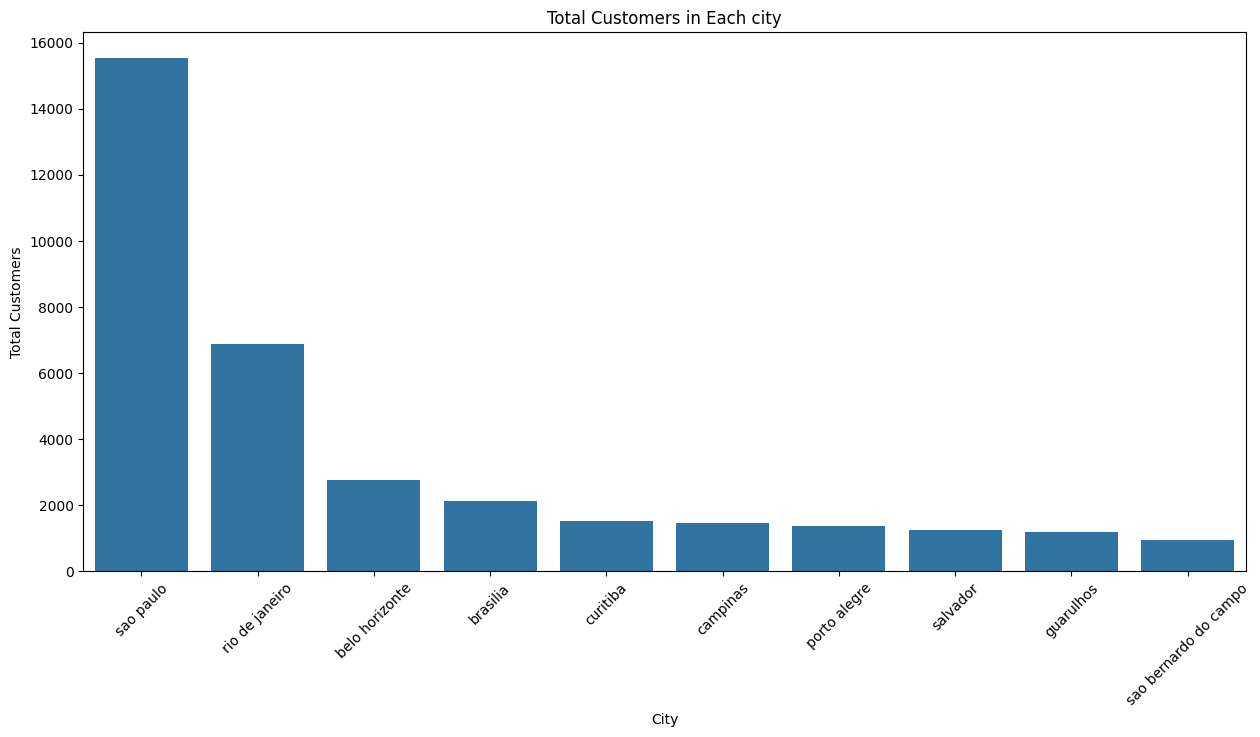

In [113]:
plt.figure(figsize=(15, 7))
plt.title("Total Customers in Each city")

sns.color_palette("Set2")
sns.barplot(data=data_block6[:10].sort_values(by="total_customers", ascending=False),
            x="customer_city",
            y="total_customers")

plt.xticks(rotation=45)
plt.xlabel("City")
plt.ylabel("Total Customers")

plt.show()

### Code Block 7: Customer Segmentation Based on payment method

In [60]:
data_block7 = pd.read_csv(STARTER_PATH + "4.code_block_7__Customsed_on_payment_method.csv")
data_block7

,payment_type,total_orders
0,credit_card,76795
1,boleto,19784
2,voucher,5775
3,debit_card,1529
4,not_defined,3


In [130]:
data_block7 = data_block7.loc[data_block7["payment_type"] != "not_defined"]
data_block7

,payment_type,total_orders
0,credit_card,76795
1,boleto,19784
2,voucher,5775
3,debit_card,1529


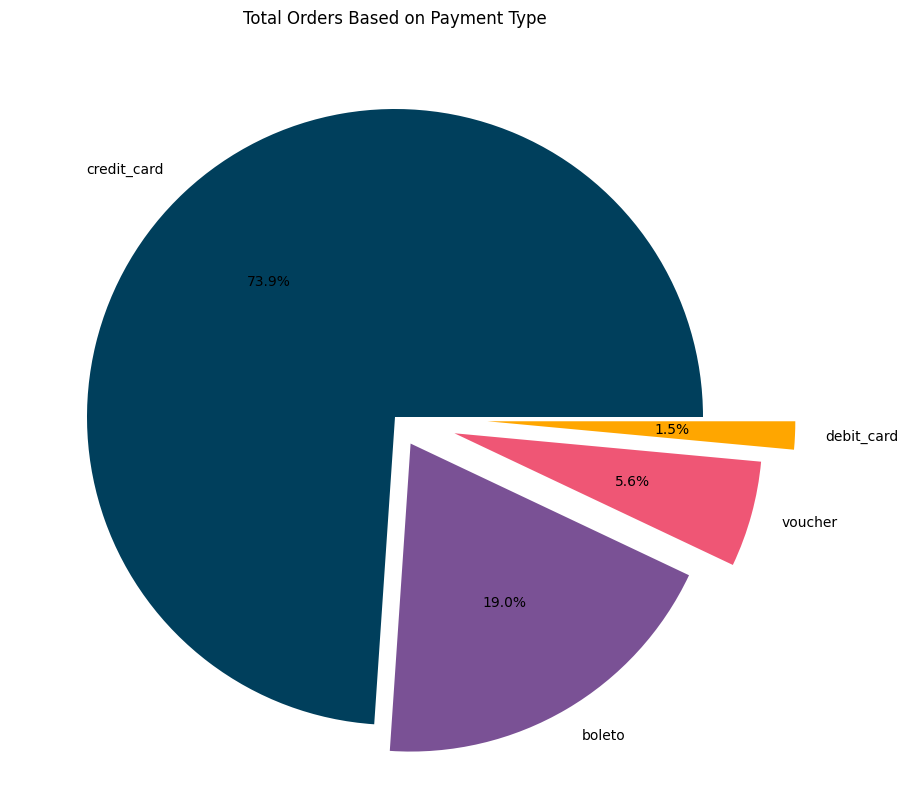

In [147]:
plt.figure(figsize=(10, 10))
plt.title("Total Orders Based on Payment Type")

explode = (0, 0.1, 0.2, 0.3)
plt.pie(data=data_block7,
            labels="payment_type",
            x="total_orders",
            explode=explode,
            autopct='%1.1f%%', 
            colors=["#003f5c", "#7a5195", "#ef5675", "#ffa600"])

plt.xticks(rotation=45)

plt.show()

### Code Block 8: Customer Segmentation Based on payment method and location

In [144]:
data_block8 = pd.read_csv(STARTER_PATH + "5.code_block_8__Customt_method_and_location.csv")
data_block8.head()

,payment_type,customer_city,total_orders,total_customers
0,credit_card,sao paulo,12226,11766
1,credit_card,rio de janeiro,5525,5332
2,boleto,sao paulo,2783,2722
3,credit_card,belo horizonte,2233,2153
4,credit_card,brasilia,1693,1643


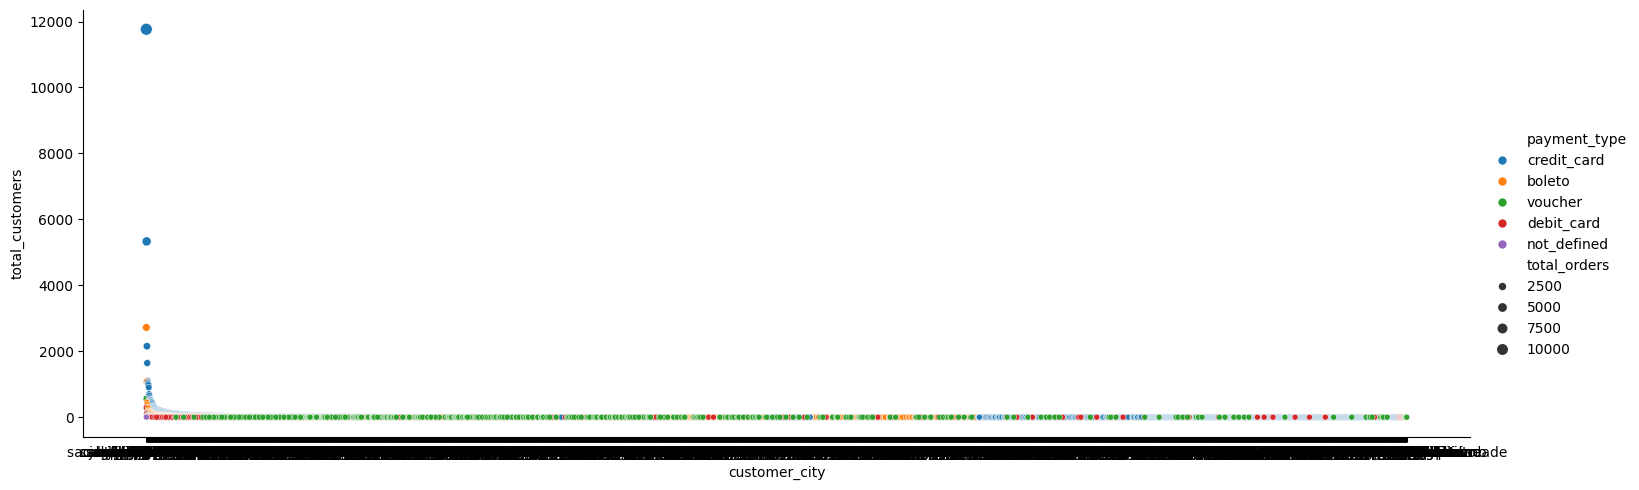

In [152]:
# plt.title("Total Orders Based on Payment Type")
sns.relplot(data=data_block8, x="customer_city", y="total_customers", hue="payment_type", size="total_orders", height=5, aspect=3)

plt.show()

### Code Block 9: Customers location vs product category

In [63]:
data_block9 = pd.read_csv(STARTER_PATH + "6.Code_block_9___Custon_vs_product_category.csv")
data_block9.head()

,product_category_name_english,customer_city,deal_per_location_category
0,bed_bath_table,sao paulo,17808
1,bed_bath_table,rio de janeiro,7837
2,computers_accessories,belo horizonte,3144
3,computers_accessories,brasilia,2392
4,toys,curitiba,1751


## Code Block 10

In [64]:
data_block10 = pd.read_csv(STARTER_PATH + "7.Code_block_10___Checal_sale_for_each_city.csv")
data_block10.head()

,season,year,customer_city,total_revenue,total_freight_value
0,Fall,2016,alem paraiba,69.90,19.48
1,Fall,2016,ananindeua,189.00,48.45
2,Fall,2016,aparecida de goiania,49.00,25.15
3,Fall,2016,apuarema,169.99,34.39
4,Fall,2016,aracaju,58.00,21.99


## Code Block 11

In [65]:
data_block11 = pd.read_csv(STARTER_PATH + "8.code_block_11.csv")
data_block11.head()

,purchase_time,customer_city,total_revenue,total_freight_value
0,2016-09-04 21:15:19,boa vista,72.89,63.34
1,2016-09-05 00:15:34,passo fundo,59.50,15.56
2,2016-09-15 12:16:38,sao joaquim da barra,134.97,8.49
3,2016-10-02 22:07:52,sao paulo,100.00,9.34
4,2016-10-03 09:44:50,sao paulo,29.90,15.56


## Code Block 12

In [66]:
data_block12 = pd.read_csv(STARTER_PATH + "9.code_block_12__for_gegardless_of_location.csv")
data_block12.head()

,season,year,total_revenue,total_freight_value
0,Fall,2016,49518.56,7309.90
1,Summer,2016,267.36,87.39
2,Fall,2017,2418404.97,393598.40
3,Spring,2017,1299036.97,202539.26
4,Summer,2017,1696404.85,277170.28


## Code Block 13

In [68]:
data_block13 = pd.read_csv(STARTER_PATH + "10. code_block_13___tota_freight_per_category.csv")
data_block13.head()

,category,total_sale,total_freight
0,Unknown,185049.76,28613.14
1,agro_industry_and_commerce,72530.47,5843.60
2,air_conditioning,55024.96,6749.23
3,art,24202.64,4045.17
4,arts_and_craftmanship,1814.01,370.13


## Code Block 14

In [69]:
data_block14 = pd.read_csv(STARTER_PATH + "11. code_block_14___totand_revenue_per_Seller.csv")
data_block14.head()

,city,total_sale,total_freight
0,04482255,399.90,16.55
1,abadia de goias,142.47,43.41
2,afonso claudio,293.99,119.27
3,aguas claras df,35.00,17.78
4,alambari,138.60,81.15


## Code Block 15

In [70]:
data_block15 = pd.read_csv(STARTER_PATH + "12. code_block_15___top_50_most_sold_products.csv")
data_block15.head()

,product_id,total_sales
0,aca2eb7d00ea1a7b8ebd4e68314663af,527
1,99a4788cb24856965c36a24e339b6058,488
2,422879e10f46682990de24d770e7f83d,484
3,389d119b48cf3043d311335e499d9c6b,392
4,368c6c730842d78016ad823897a372db,388


## Code Block 16

In [71]:
data_block16 = pd.read_csv(STARTER_PATH + "13. code_block_16___top_e_products_in_general.csv")
data_block16.head()

,product_id,revenue,freight_price
0,bb50f2e236e5eea0100680137654686c,63885.00,3721.10
1,6cdd53843498f92890544667809f1595,54730.20,4363.79
2,d6160fb7873f184099d9bc95e30376af,48899.34,1426.84
3,d1c427060a0f73f6b889a5c7c61f2ac4,47214.51,13761.52
4,99a4788cb24856965c36a24e339b6058,43025.56,8046.04


## Code Block 17

In [72]:
data_block17 = pd.read_csv(STARTER_PATH + "14. code_block_17__revenpita_for_each_product.csv")
data_block17.head()

,product_id,revenue,revenue_per_capita,unit_price,freight_price
0,bb50f2e236e5eea0100680137654686c,63885.00,327.62,330.0,3721.10
1,6cdd53843498f92890544667809f1595,54730.20,350.83,349.9,4363.79
2,d6160fb7873f184099d9bc95e30376af,48899.34,1397.12,1300.0,1426.84
3,d1c427060a0f73f6b889a5c7c61f2ac4,47214.51,137.65,149.0,13761.52
4,99a4788cb24856965c36a24e339b6058,43025.56,88.17,74.0,8046.04


## Code Block 18

In [73]:
data_block18 = pd.read_csv(STARTER_PATH + "15. codeBlock_18_based_on_price____fr_by_size_of_product.csv")
data_block18.head()

,product_id,number_of_sales,price,size,weight
0,aca2eb7d00ea1a7b8ebd4e68314663af,527,69.9,15000.0,2600.0
1,99a4788cb24856965c36a24e339b6058,488,74.0,20000.0,1383.0
2,422879e10f46682990de24d770e7f83d,484,53.9,19800.0,1550.0
3,389d119b48cf3043d311335e499d9c6b,392,49.9,32560.0,1750.0
4,368c6c730842d78016ad823897a372db,388,49.9,19800.0,1650.0


## Code Block 19

In [74]:
data_block19 = pd.read_csv(STARTER_PATH + "16. code_block_19___canceled_products.csv")
data_block19.head()

,order_status,order_id,product_category_name,seller_id
0,canceled,1b9ecfe83cdc259250e1a8aca174f0ad,informatica_acessorios,9646c3513289980f17226a2fc4720dbd
1,canceled,714fb133a6730ab81fa1d3c1b2007291,moveis_decoracao,95f83f51203c626648c875dd41874c7f
2,canceled,3a129877493c8189c59c60eb71d97c29,esporte_lazer,3fd1e727ba94cfe122d165e176ce7967
3,canceled,0966b61e30c4a07edbd7523f59b3f3e4,moveis_decoracao,37ceb404da208418c9032f0674e57804
4,canceled,0966b61e30c4a07edbd7523f59b3f3e4,moveis_decoracao,37ceb404da208418c9032f0674e57804


## Code Block 20

In [75]:
data_block20 = pd.read_csv(STARTER_PATH + "17. code_block_20__Infogaphic_of_order_status.csv")
data_block20.head()

,status,total_orders,percentage
0,approved,2,0.002011
1,canceled,625,0.628513
2,created,5,0.005028
3,delivered,96478,97.020344
4,invoiced,314,0.315765


## Code Block 21

In [76]:
data_block21 = pd.read_csv(STARTER_PATH + "18. code_block_21___Info_and_product_category.csv")
data_block21.head()

,Status,Category,location,percentage_per_category
0,canceled,Unknown,bady bassitt,0.182149
1,canceled,Unknown,bauru,0.182149
2,canceled,Unknown,joinville,0.182149
3,canceled,Unknown,lins,0.182149
4,canceled,Unknown,nova friburgo,0.182149


## Code Block 22

In [77]:
data_block22 = pd.read_csv(STARTER_PATH + "19. code_block_22___Infocts_based_on_location.csv")
data_block22.head()

,Status,location,percentage_per_category
0,canceled,americana,0.364299
1,canceled,anapolis,0.182149
2,canceled,andradina,0.182149
3,canceled,angra dos reis,0.182149
4,canceled,aparecida de goiania,0.182149


## Code Block 23

In [78]:
data_block23 = pd.read_csv(STARTER_PATH + "20. code_block_23___Infod_on_product_category.csv")
data_block23.head()

,Status,Category,percentage_per_category
0,canceled,Unknown,2.550091
1,canceled,alimentos,0.182149
2,canceled,alimentos_bebidas,0.364299
3,canceled,artes,0.182149
4,canceled,artigos_de_natal,0.182149


## Code Block 24

In [79]:
data_block24 = pd.read_csv(STARTER_PATH + "21. code_block_24__rolliTE_table_is_included.csv")
data_block24.head()

,seller_id,seller_city,total_outcome,Rolling_Total
0,ceb7b4fb9401cd378de7886317ad1b47,04482255,399.90,399.90
1,c8143b3069f6746a77421b5ce30a450c,abadia de goias,142.47,142.47
2,2f4b9d112bfa44a214bc6cef085d17c8,afonso claudio,293.99,293.99
3,3a52d63a8f9daf5a28f3626d7eb9bd28,aguas claras df,35.00,35.00
4,717b78b0950b51ed00b1471d858b0edc,alambari,138.60,138.60


## Code Block 25

In [80]:
data_block25 = pd.read_csv(STARTER_PATH + "22. code_block_25__Averacome_in_each_location.csv")
data_block25.head()

,seller_city,average_revenue
0,04482255,399.90
1,abadia de goias,142.47
2,afonso claudio,293.99
3,aguas claras df,35.00
4,alambari,138.60


## Code Block 26 is empty output

In [48]:
# data_block26 = pd.read_csv(STARTER_PATH + "")

## Code Block 27

In [81]:
data_block27 = pd.read_csv(STARTER_PATH + "23. code_block_27__answe_time_monthly_changes.csv")
data_block27.head()

,review_id,review_score,review_creation_date,review_answer_timestamp,RA_time_diffrance_in_hour
0,7bc2406110b926393aa56f80a40eba40,4,2018-01-18 00:00:00,2018-01-18 21:46:59,21
1,80e641a11e56f04c1ad469d5645fdfde,5,2018-03-10 00:00:00,2018-03-11 03:05:13,27
2,228ce5500dc1d8e020d8d1322874b6f0,5,2018-02-17 00:00:00,2018-02-18 14:36:24,38
3,e64fb393e7b32834bb789ff8bb30750e,5,2017-04-21 00:00:00,2017-04-21 22:02:06,22
4,f7c4243c7fe1938f181bec41a392bdeb,5,2018-03-01 00:00:00,2018-03-02 10:26:53,34


## Code Block 28-1

In [83]:
data_block281 = pd.read_csv(STARTER_PATH + "24. code_block_28-1__custobased_on_review_score.csv")
data_block281.head()

,review_id,review_score,review_creation_date,review_answer_timestamp,RA_time_diffrance_in_hour
0,7bc2406110b926393aa56f80a40eba40,4,2018-01-18 00:00:00,2018-01-18 21:46:59,21
1,80e641a11e56f04c1ad469d5645fdfde,5,2018-03-10 00:00:00,2018-03-11 03:05:13,27
2,228ce5500dc1d8e020d8d1322874b6f0,5,2018-02-17 00:00:00,2018-02-18 14:36:24,38
3,e64fb393e7b32834bb789ff8bb30750e,5,2017-04-21 00:00:00,2017-04-21 22:02:06,22
4,f7c4243c7fe1938f181bec41a392bdeb,5,2018-03-01 00:00:00,2018-03-02 10:26:53,34


## Code Block 28-2

In [84]:
data_block282 = pd.read_csv(STARTER_PATH + "25. code_block_28-2_average_score_per_time.csv")
data_block282.head()

,review_year,review_Month,Average_score
0,2016,10,4.06
1,2016,11,3.19
2,2016,12,2.36
3,2017,1,4.34
4,2017,2,4.28


## Code Block 29

In [85]:
data_block29 = pd.read_csv(STARTER_PATH + "26. code_block_29__custo___customer_location.csv")
data_block29.head()

,review_year,review_Month,average_review_score,customer_city
0,2016,10,3.72,coromandel
1,2016,10,4.00,nossa senhora da gloria
2,2016,10,3.61,sao goncalo
3,2016,10,2.00,vargem
4,2016,11,4.00,apuarema


## Code Block 30

In [87]:
data_block30 = pd.read_csv(STARTER_PATH + "27. code_block_30__custosed_on_payment_method.csv")
data_block30.head()

,payment_type,average_review_score
0,boleto,4.08
1,credit_card,4.08
2,debit_card,4.17
3,not_defined,1.50
4,voucher,3.98


## Code Block 31-1

In [88]:
data_block311 = pd.read_csv(STARTER_PATH + "28. code_block_31-1__custod_on_product_category.csv")
data_block311.head()

,category,review_year,review_Month,average_review_score
0,agro_industria_e_comercio,2017,2,4.17
1,agro_industria_e_comercio,2017,3,3.17
2,agro_industria_e_comercio,2017,5,5.00
3,agro_industria_e_comercio,2017,6,4.50
4,agro_industria_e_comercio,2017,7,3.00


## Code Block 31-2

In [90]:
data_block312 = pd.read_csv(STARTER_PATH + "29. code_block_31-2__another_version.csv")
data_block312.head()

,category,review_date,average_review_score
0,agro_industria_e_comercio,2017-02,4.17
1,agro_industria_e_comercio,2017-03,3.17
2,agro_industria_e_comercio,2017-05,5.00
3,agro_industria_e_comercio,2017-06,4.50
4,agro_industria_e_comercio,2017-07,3.00


## Code Block 32

In [91]:
data_block32 = pd.read_csv(STARTER_PATH + "30. code_block_32__custo_category___quarterly.csv")
data_block32.head()

,category,season,review_year,average_review_score
0,agro_industria_e_comercio,Fall,2017,3.42
1,agro_industria_e_comercio,Spring,2017,4.75
2,agro_industria_e_comercio,Summer,2017,3.88
3,agro_industria_e_comercio,Winter,2017,3.67
4,agro_industria_e_comercio,Spring,2018,4.07


## Code Block 33

In [92]:
data_block33 = pd.read_csv(STARTER_PATH + "31. code_block_33_analysnges_in_monthly_frame.csv")
data_block33.head()

,date,customer_city,Delivery_lead_time,Estimated_Delivery_lead_time
0,2016-09,sao joaquim da barra,1315.0,443.0
1,2016-10,alem paraiba,809.0,1346.0
2,2016-10,ananindeua,840.0,1549.0
3,2016-10,aparecida de goiania,182.0,1446.0
4,2016-10,apuarema,548.0,1544.0


## Code Block 34

In [93]:
data_block34 = pd.read_csv(STARTER_PATH + "32. code_block_34__analynges_in_monthly_frame.csv")
data_block34.head()

,date,approval_time_in_minute
0,2016-09,0.00
1,2016-10,1246.34
2,2016-12,14.00
3,2017-01,713.59
4,2017-02,563.80


## Code Block 35

In [94]:
data_block35 = pd.read_csv(STARTER_PATH + "33. code_block_35__analyfter_approving_order.csv")
data_block35.head()

,date,Deliver_to_carrier_after_approval_mins
0,2016-09,76615.00
1,2016-10,18570.86
2,2016-12,4722.00
3,2017-01,4237.80
4,2017-02,4659.41
